In [0]:
from mp1 import *
from model_mp1 import *
from plotter import *
from processor import *
import numpy as np
%matplotlib inline

Using TensorFlow backend.


# 3.  Simple classification

Creating data:
0
100
200
prediction of a disk with sgd optimizer:  [[0. 1. 0.]]
prediction of a disk with adam optimizer:  [[0. 1. 0.]]


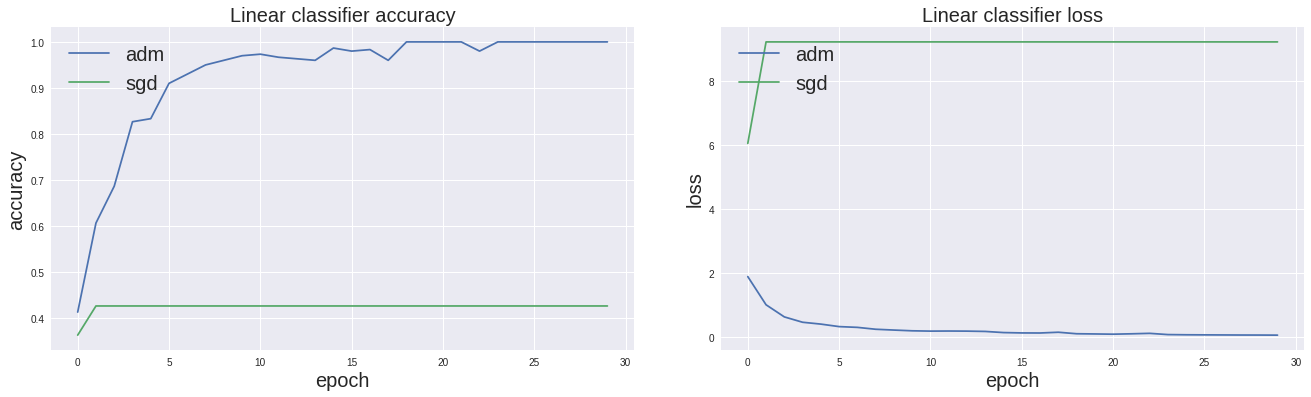

In [0]:
# generate dataset
[X_train, Y_train] = generate_dataset_classification(300, 20)
y_train = np_utils.to_categorical(Y_train, num_classes=3)

# dense layer model
model_sgd = DenseModel(optimizer='sgd')
history_sgd=model_sgd.fit(X_train, y_train,batch_size=32,epochs=30,verbose=0)

model_adam = DenseModel(optimizer='adam')
history_adam=model_adam.fit(X_train, y_train,batch_size=32,epochs=30,verbose=0)

#evaluation
np.random.seed()
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
print('prediction of a disk with sgd optimizer: ',model_sgd.predict(X_test))
print('prediction of a disk with adam optimizer: ',model_adam.predict(X_test))

# plot the evolution of accuracy and loss
plot_acc_loss(his1=history_adam,his2=history_sgd,legend1='adm',legend2='sgd',
              title1='Linear classifier accuracy',title2='Linear classifier loss')

### Explanation
During the process of the training, we can notice that the performance of adam optimizeris always better than sgd optimizer. sgd optimizer converges quickly to a bad local optimum, whearas adam optimizer continues improve the accuarcy and get close to 100% of accuarcy since the 17th epoch.

Considering the fact that it is difficult to choose learning rate and we cannot adjust the learning rate during the training process for sgd optimizer, adam optimizer is more robust.



# Visualization of solution

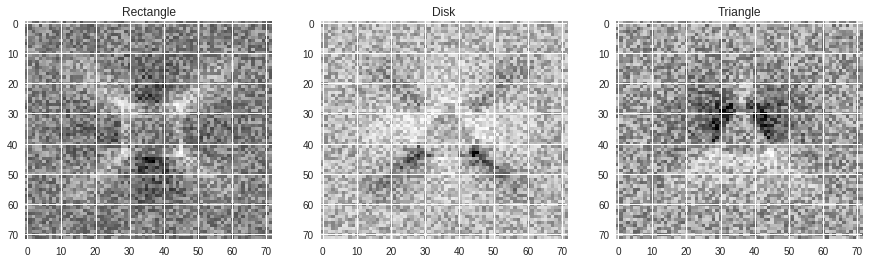

In [0]:
solution=model_adam.get_weights()[0]
visual_solution(solution)

### Explanation
We should notice the data for this 'simple classification problem' is special : the of triangles, circles and rectanglesare are always centered. With adam optimizer, the performance of the linear classifier can be quite good. From the visualization of the weights (with adam optimizer), we can see the shape of triangle, circle and rectangle. They are just like filters for the three shapes

# 5. A More Diﬃcult Classiﬁcation Problem

300/300 [==============================] - 3s 11ms/step
loss: 0.21767730911572775 accuracy: 0.9333333325386047


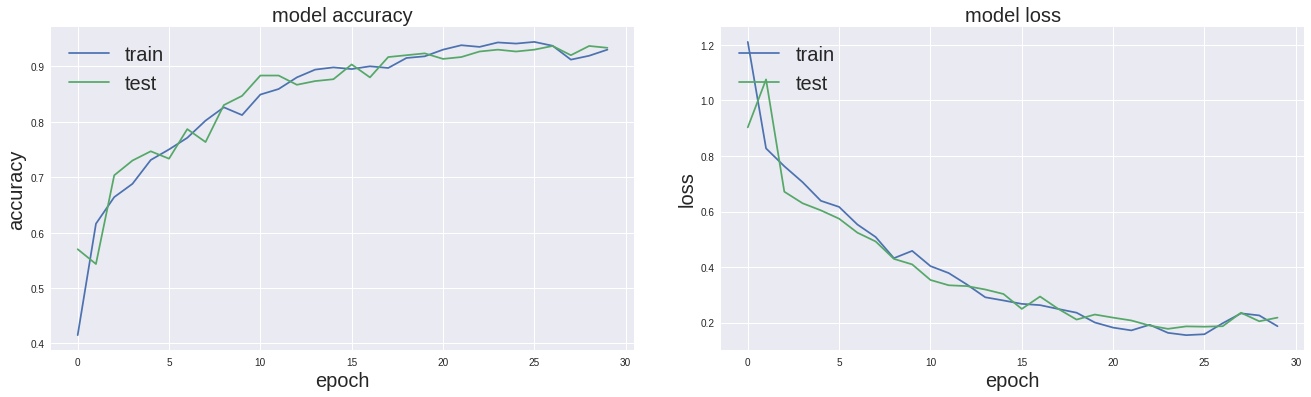

In [0]:
# generate dataset
[X_train, Y_train] = generate_dataset_classification(1000, 20, True)
[X_test, Y_test] = generate_test_set_classification()
x_train=X_train.reshape(-1,1,72,72)
y_train = np_utils.to_categorical(Y_train, num_classes=3)
x_test=X_test.reshape(-1,1,72,72)
y_test = np_utils.to_categorical(Y_test, num_classes=3)

# Model
model_CNN = CNN_ClassModel(input_shape=(1, 72, 72),n_class=3)
history_CNN=model_CNN.fit(x_train, y_train, epochs=30,validation_data=(x_test, Y_test))

# evaluation result
[X_test, Y_test] = generate_test_set_classification()
x_test=X_test.reshape(-1,1,72,72)
loss,accuracy=model_CNN.evaluate(x_test, Y_test)
print("loss:",loss, "accuracy:",accuracy)
plot_trainval(his=history_CNN)

### Explanation
For this 'more difficult classification problem', the locations of shapes are freeze. The linear classifier will not work, so we build a CNN model, which extracts the features of the images which are independent on the locations.

Here, the network is consisted of one convolution2D layer, one maxpooling layer, one flattenlayer, one output layer(dense), and one dense layer between the maxpooling layer and the output layer. I add one dense layer between the maxpooling layer and the output layer, for better classification on the features extracted by the convolutional layers and downsampled by the pooling layers. 

I also use dropout which is quite helpful for reducing overfitting and categorical crossentropy loss function. We can see from the graphs above that this model gets a good performance with final accuracy = 93.3%, final loss = 0.22

# 6. A Regression Problem

In [0]:
[X_train, Y_train] = generate_dataset_regression(3000, 20)
[X_test, Y_test] = generate_test_set_regression()
x_train=X_train.reshape(-1,1,72,72)
x_test=X_test.reshape(-1,1,72,72)

y_train=np.apply_along_axis(normalize_perim, 1, Y_train)
y_test=np.apply_along_axis(normalize_perim, 1, Y_test)

model_regCNN, callbacks_list = CNN_RegModel(input_shape=(1,72,72),
                                            output_dim=6,model_path='model.h5')


In [0]:
history_regCNN=model_regCNN.fit(x_train, y_train, epochs=20,
                         validation_data=(x_test, y_test),
                         callbacks=callbacks_list)


Train on 3000 samples, validate on 300 samples
Epoch 1/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0520 - acc: 0.5447 - val_loss: 0.0229 - val_acc: 0.6667

Epoch 00001: loss improved from inf to 0.05198, saving model to model.h5
Epoch 2/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0169 - acc: 0.7310 - val_loss: 0.0110 - val_acc: 0.7933

Epoch 00002: loss improved from 0.05198 to 0.01688, saving model to model.h5
Epoch 3/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0088 - acc: 0.8147 - val_loss: 0.0069 - val_acc: 0.7933

Epoch 00003: loss improved from 0.01688 to 0.00877, saving model to model.h5
Epoch 4/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0059 - acc: 0.8380 - val_loss: 0.0050 - val_acc: 0.8667

Epoch 00004: loss improved from 0.00877 to 0.00587, saving model to model.h5
Epoch 5/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0045 - acc: 0.8597 - val_loss: 

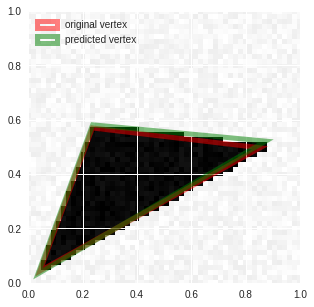

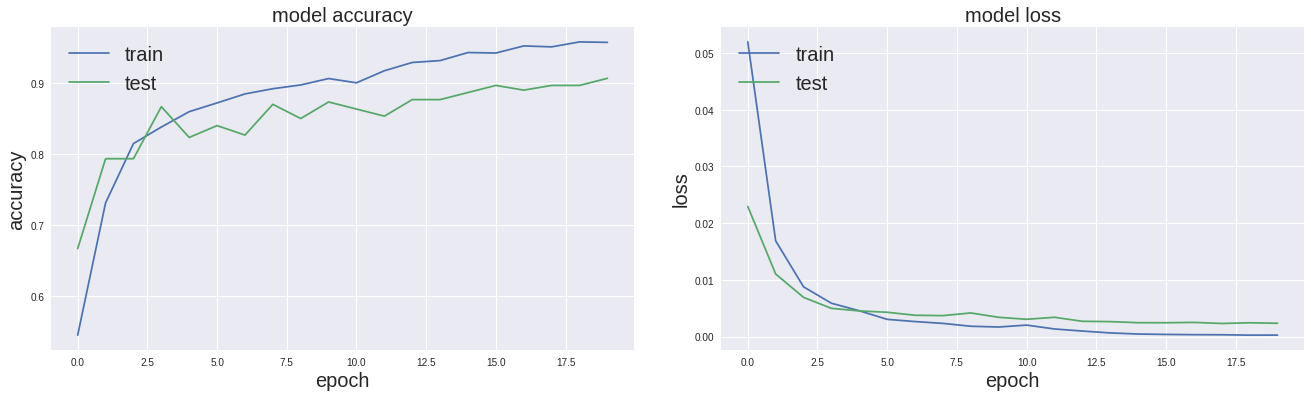

In [0]:
# you can change the index to see the prediction of a certain image
vertex_predict(index=28,model=model_regCNN,X_test=X_test,Y_test=Y_test,x_test=x_test)
# evolution of accuracy and loss
plot_trainval(his=history_regCNN)

### Explanation
Before designing the model, I preprocess the data of the target values Y, reordering the vertexes of the triangles according to the yaxis value, because the random order of the vertexe swill affect the accuracy of the final result. 

Unlike the simple convolutional network for classification, I use four conv2D + relu +pooling (for better retrieving the features) and two dense layers (for better regression) and one dense output layer. Here, I use ‘tanh’ activation but not ‘softmax’, because the output of the softmax function can be used to represent a probability distribution, which is more suitable forclassification problem. However, with the regression problem, ‘mse’ loss function and ‘tanh’ activation are more suitable.The number of training samples is also very important, without enough samples, the training process can be easily stuck in the gradient vanishing problem.

The final loss on the test set is 0.00025. I draw an example in the graph above, we can see that the performance of the model is quite satisfyting.

# 7. Image Denoising

In [0]:
# generate dataset
[X_train,Y_train]=generate_dataset_denoising(1000,10,30)
x_train=X_train.reshape(-1,72,72,1)
y_train=Y_train.reshape(-1,72,72,1)
[X_test,Y_test]=generate_testset_denoising(10,30)
x_test=X_test.reshape(-1,72,72,1)
y_test=Y_test.reshape(-1,72,72,1)

model_hourglass = hourglass(input_shape=(72,72,1),lr=0.001)

history_hourglass = model_hourglass.fit(x_train, y_train, epochs=6,batch_size=32,
                             shuffle=True,validation_data=(x_test, y_test))

Train on 1000 samples, validate on 300 samples
Epoch 1/6
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0633 - acc: 0.9905 - val_loss: 0.0208 - val_acc: 0.9983
Epoch 2/6
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0078 - acc: 0.9992 - val_loss: 0.0111 - val_acc: 0.9984
Epoch 3/6
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0048 - acc: 0.9994 - val_loss: 0.0093 - val_acc: 0.9988
Epoch 4/6
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0031 - acc: 0.9998 - val_loss: 0.0072 - val_acc: 0.9989
Epoch 5/6
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0023 - acc: 0.9999 - val_loss: 0.0069 - val_acc: 0.9991
Epoch 6/6
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 0.9993


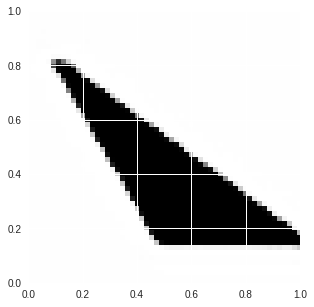

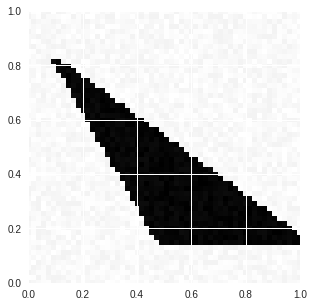

In [0]:
y=model_hourglass.predict(x_test[116][np.newaxis,:])
visualize_predhourglass(y,'predict_116')
visualize_predhourglass(X_test[116],'test_116')

### Explanation
According to the structure of the hourglass network given in the slide of the course, thenetwork is consisted of one conv + batch normalization + relu, one maxpooling layer, oneupsampling layer, another conv + batch normalization + relu, one output layer(conv2D withsigmoid activation). Hourglass network is quite useful for segmentation. Here we only have black shapes, so we can see that it does great in segmentation: separate the black images and the noise well. Thefinal loss on the test set is 0.0065